In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from resource_functions import *

# Base de Dados - World Development Indicators (WDI)

Os Indicadores de Desenvolvimento Mundial (WDI) são a principal coleção de indicadores de desenvolvimento do Banco Mundial, compilados a partir de fontes internacionais oficialmente reconhecidas. Apresenta os dados de desenvolvimento global mais atuais e precisos disponíveis e inclui estimativas nacionais, regionais e globais.

Os Indicadores de Desenvolvimento Mundial são uma compilação de estatísticas relevantes, de alta qualidade e comparáveis internacionalmente sobre o desenvolvimento global e a luta contra a pobreza. A base de dados contém 1.400 indicadores de séries cronológicas para 217 economias e mais de 40 grupos de países, com dados para muitos indicadores que remontam a mais de 50 anos [[1](https://datatopics.worldbank.org/world-development-indicators/)]. 

## Objetivos
Para este estudo, optamos por utilizar alguns dos indicadores e avaliar como eles se comportam em diferentes grupos de países. Ao final, pretende-se respoder as perguntas:

  1. Quais grupos de países possuem maior serie historia dos indicadores?
  2. Quais regiões possuem maior cobertura de dados?
  3. Como os indicadores variaram durante os anos para cada grupo de países?

### Objetivos específicos

Para responder as perguntas precisamos seguir uma sequencia de análises e trasnsformações nos dados. Dessa forma, seguem os objetivos específicos deste trabalho:

 * Coletar os dados
 * Identificar as bases com os indicadores relevantes
 * Filtrar inconsistências das bases de dados
 * Agrupar, as bases com informações relevantes
 * Compiolar os historicos dos indicadores
 * Gerar graficos e tabelas que auxiliem a visualização das análises.

## Indicadores utilizados 

Os indicadores utilizados são os relacionados com:

  1. Pobreza e Desigualdade:
     * "Poverty headcount ratio at $2.15 a day (2017 PPP) (% of population)"  (SI.POV.DDAY)
        * Esse indicador mostra a porcentagem de pessoas vivendo com menos de $2.15 por dia, considerando os preços internacionais do ano de 2017. 
  2. Demografia
     * "Population, total" (SP.POP.TOTL)
        * População total do pais, independentemente da situação de cidadania e status legal.
     * "Labor force participation rate, total (% of total population ages 15+) (modeled ILO estimate)" (SL.TLF.CACT.ZS)
        * Porcentagem da população com 15 anos ou mais que é economicamente ativa.
     * "School enrollment, primary and secondary (gross), gender parity index (GPI)" (SE.ENR.PRSC.FM.ZS)
        * indice da relação entre gêneros que frequentam escola primaria e secundária.
  3. Meio ambiente
     * "CO2 emissions (metric tons per capita)" (EN.ATM.CO2E.PC)
     * "Forest area (% of land area)" (AG.LND.FRST.ZS)
     * "Access to electricity, urban (% of urban population)" (EG.ELC.ACCS.UR.ZS)

## Bases de dados
Vamos utilizar as bases WDIData e WDICountry

In [3]:
FOLDER_PATH = './bases'
#wdi_country_series_df = pd.read_csv(f'{FOLDER_PATH}/WDICountry-Series.csv', sep=',')
wdi_data_df = pd.read_csv(f'{FOLDER_PATH}/WDIData.csv', sep=',')
#wdi_foot_note_df = pd.read_csv(f'{FOLDER_PATH}/WDIFootNote.csv', sep=',')
#wdi_series_time_df = pd.read_csv(f'{FOLDER_PATH}/WDISeries-Time.csv', sep=',')
#wdi_series_df = pd.read_csv(f'{FOLDER_PATH}/WDISeries.csv', sep=',')
wdi_country_df = pd.read_csv(f'{FOLDER_PATH}/WDICountry.csv', sep=',')

### WDICountry

In [4]:
wdi_country_df.head()

,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,...,Government Accounting concept,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Unnamed: 30
0,ABW,Aruba,Aruba,Aruba,AW,Aruban florin,NaN,Latin America & Caribbean,High income,AW,...,NaN,Enhanced General Data Dissemination System (e-...,2020 (expected),NaN,NaN,Yes,NaN,NaN,2018.0,NaN
1,AFE,Africa Eastern and Southern,Africa Eastern and Southern,Africa Eastern and Southern,ZH,NaN,"26 countries, stretching from the Red Sea in t...",NaN,NaN,ZH,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,The reporting period for national accounts dat...,South Asia,Low income,AF,...,Consolidated central government,Enhanced General Data Dissemination System (e-...,1979,"Demographic and Health Survey, 2015","Integrated household survey (IHS), 2016/17",NaN,NaN,NaN,2018.0,NaN
3,AFW,Africa Western and Central,Africa Western and Central,Africa Western and Central,ZI,NaN,"22 countries, stretching from the westernmost ...",NaN,NaN,ZI,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AGO,Angola,Angola,People's Republic of Angola,AO,Angolan kwanza,The World Bank systematically assesses the app...,Sub-Saharan Africa,Lower middle income,AO,...,Budgetary central government,Enhanced General Data Dissemination System (e-...,2014,"Demographic and Health Survey, 2015/16","Integrated household survey (IHS), 2008/09",NaN,NaN,NaN,2018.0,NaN


In [5]:
print(wdi_country_df.columns)

Index(['Country Code', 'Short Name', 'Table Name', 'Long Name', '2-alpha code',
       'Currency Unit', 'Special Notes', 'Region', 'Income Group', 'WB-2 code',
       'National accounts base year', 'National accounts reference year',
       'SNA price valuation', 'Lending category', 'Other groups',
       'System of National Accounts', 'Alternative conversion factor',
       'PPP survey year', 'Balance of Payments Manual in use',
       'External debt Reporting status', 'System of trade',
       'Government Accounting concept', 'IMF data dissemination standard',
       'Latest population census', 'Latest household survey',
       'Source of most recent Income and expenditure data',
       'Vital registration complete', 'Latest agricultural census',
       'Latest industrial data', 'Latest trade data', 'Unnamed: 30'],
      dtype='object')


### Metadata

#### Colunas:

- **Country Code** =   **Código do País**
- **Short Name** =   **Nome Curto**
- **Table Name** =   **Nome da Tabela**
- **Long Name** =   **Nome Completo**
- **2-alpha code** =   **Código 2-alpha**
- **Currency Unit** =   **Unidade Monetária**
- **Special Notes** =   **Notas Especiais**
- **Region** =   **Região**
- **Income Group** =   **Grupo de Renda**
- **WB-2 code** =   **Código WB-2**
- **National accounts base year** =   **Ano Base das Contas Nacionais**
- **National accounts reference year** =   **Ano de Referência das Contas Nacionais**
- **SNA price valuation** =   **Avaliação de Preços pelo SNA**
- **Lending category** =   **Categoria de Empréstimo**
- **Other groups** =   **Outros Grupos**
- **System of National Accounts** =   **Sistema de Contas Nacionais**
- **Alternative conversion factor** =   **Fator de Conversão Alternativo**
- **PPP survey year** =   **Ano da Pesquisa PPC**
- **Balance of Payments Manual in use** =   **Manual de Balanço de Pagamentos em Uso**
- **External debt Reporting status** =   **Status de Relato de Dívida Externa**
- **System of trade** =   **Sistema de Comércio**
- **Government Accounting concept** =   **Conceito de Contabilidade Governamental**
- **IMF data dissemination standard** =   **Padrão de Disseminação de Dados do FMI**
- **Latest population census** =   **Último Censo Populacional**
- **Latest household survey** =   **Última Pesquisa Domiciliar**
- **Source of most recent Income and expenditure data** =   **Fonte dos Dados mais Recentes de Renda e Despesa**
- **Vital registration complete** =   **Registro Vital Completo**
- **Latest agricultural census** =   **Último Censo Agrícola**
- **Latest industrial data** =   **Dados Industriais mais Recentes**
- **Latest trade data** =   **Dados Comerciais mais Recentes**


Essa base nor fornece informações sobre o grupo de populações e os grupos de países. Essas informações serão úteis na agregação dos indicadores dentro desses grupos.

Última coluna não possui dados, e vamos desconsiderar.
### Retirando última coluna

In [6]:
wdi_country_df = wdi_country_df.drop("Unnamed: 30", axis = 1)

Selecionando algumas colunas para a primeira analise que será com base nos parâmetros de renda e região,

In [7]:
wdi_country_Slice = wdi_country_df[["Country Code", "Short Name", "Region", "Income Group"]]

In [8]:
wdi_country_Slice.head()

,Country Code,Short Name,Region,Income Group
0,ABW,Aruba,Latin America & Caribbean,High income
1,AFE,Africa Eastern and Southern,NaN,NaN
2,AFG,Afghanistan,South Asia,Low income
3,AFW,Africa Western and Central,NaN,NaN
4,AGO,Angola,Sub-Saharan Africa,Lower middle income


In [9]:
wdi_country_Slice['Income Group'].unique()

array(['High income', nan, 'Low income', 'Lower middle income',
       'Upper middle income'], dtype=object)

Temos 4 categorias e alguns paises que nao possuem essa informação, representados por "nan". 

In [10]:
incomegroups = [i for i in wdi_country_Slice['Income Group'].unique() if type(i) == str]
wdi_country_Slice['Income Group'].value_counts()

Income Group
High income            82
Lower middle income    54
Upper middle income    54
Low income             26
Name: count, dtype: int64

/Users/jose/python_projects/SantanderCodersGit/TecnicasProgramacaoAda/resource_functions.py:8: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


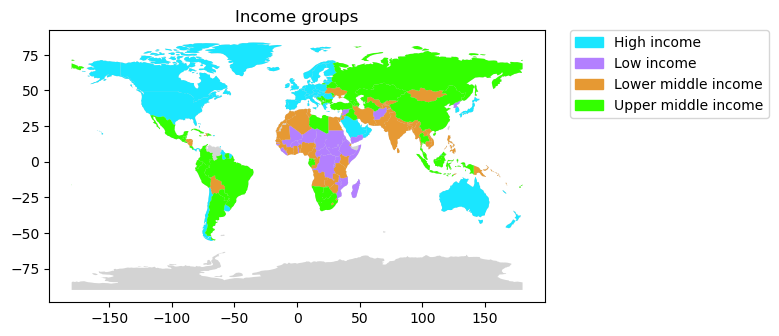

In [11]:
plot_income_group(wdi_country_Slice, incomegroups)

## WDI Data

In [12]:
wdi_data_df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,Unnamed: 67
0,Africa Eastern and Southern,AFE,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,17.392349,17.892005,18.359993,18.795151,19.295176,19.788156,20.279599,20.773627,NaN,NaN
1,Africa Eastern and Southern,AFE,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.RU.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,6.720331,7.015917,7.281390,7.513673,7.809566,8.075889,8.366010,8.684137,NaN,NaN
2,Africa Eastern and Southern,AFE,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.UR.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,38.184152,38.543180,38.801719,39.039014,39.323186,39.643848,39.894830,40.213891,NaN,NaN
3,Africa Eastern and Southern,AFE,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,31.859257,33.903515,38.851444,40.197332,43.028332,44.389773,46.268621,48.103609,NaN,NaN
4,Africa Eastern and Southern,AFE,"Access to electricity, rural (% of rural popul...",EG.ELC.ACCS.RU.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,17.623956,16.516633,24.594474,25.389297,27.041743,29.138285,30.998687,32.772690,NaN,NaN


## Removendo a ultima coluna

In [13]:
wdi_data_df = wdi_data_df.drop("Unnamed: 67", axis = 1)

## Paises com maior historico de dados para cada indicador 

In [20]:
# Contando os dados
wdi_data_df['non_nan_count'] = wdi_data_df.notna().sum(axis=1)
wdi_merge = wdi_country_df.merge(wdi_data_df, on='Country Code', how='left')

In [21]:
# "Poverty headcount ratio at $2.15 a day (2017 PPP) (% of population)"  (SI.POV.DDAY)
poverty_headcount_ratio = wdi_merge[wdi_merge["Indicator Code"] == 'SI.POV.DDAY']
poverty_headcount_ratio_sorted = poverty_headcount_ratio.sort_values(by='non_nan_count', ascending=False)
# "Population, total" (SP.POP.TOTL)
population_total = wdi_merge[wdi_merge["Indicator Code"] == 'SP.POP.TOTL']
population_total_sorted = population_total.sort_values(by='non_nan_count', ascending=False)
# "Labor force participation rate, total (% of total population ages 15+) (modeled ILO estimate)" (SL.TLF.CACT.ZS)
labor_force_participation_rate = wdi_merge[wdi_merge["Indicator Code"] == 'SL.TLF.CACT.ZS']
labor_force_participation_rate_sorted = labor_force_participation_rate.sort_values(by='non_nan_count', ascending=False)
# "School enrollment, primary and secondary (gross), gender parity index (GPI)" (SE.ENR.PRSC.FM.ZS)
school_enrollment = wdi_merge[wdi_merge["Indicator Code"] == 'SE.ENR.PRSC.FM.ZS']
school_enrollment_sorted = school_enrollment.sort_values(by='non_nan_count', ascending=False)
# "CO2 emissions (metric tons per capita)" (EN.ATM.CO2E.PC)
co2_emissions = wdi_merge[wdi_merge["Indicator Code"] == 'EN.ATM.CO2E.PC']
co2_emissions_sorted = co2_emissions.sort_values(by='non_nan_count', ascending=False)
# "Forest area (% of land area)" (AG.LND.FRST.ZS)
forest_area = wdi_merge[wdi_merge["Indicator Code"] == 'AG.LND.FRST.ZS']
forest_area_sorted = forest_area.sort_values(by='non_nan_count', ascending=False)
# "Access to electricity, urban (% of urban population)" (EG.ELC.ACCS.UR.ZS)
access_to_electricity_urban = wdi_merge[wdi_merge["Indicator Code"] == 'EG.ELC.ACCS.UR.ZS']
access_to_electricity_urban_sorted = access_to_electricity_urban.sort_values(by='non_nan_count', ascending=False)

## Indicadores - População
### População mundial

In [22]:
population_total_world = population_total_sorted[population_total_sorted["Country Code"] == "WLD"]

<Axes: title={'center': 'Population total world'}, xlabel='Year', ylabel='Population total'>

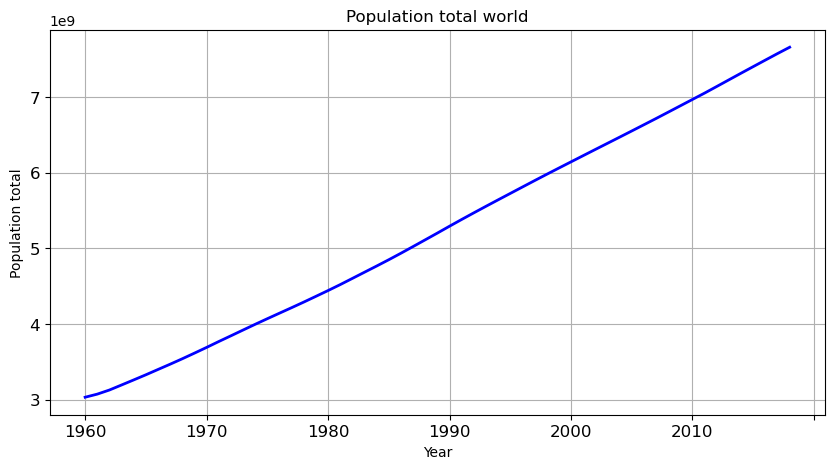

In [23]:
population_total_world.loc[:, "1960":"2018"].T.plot( legend = False, title = "Population total world", 
                                                    color = "blue", figsize = (10, 5), grid = True, linewidth = 2,
                                                    xlabel = "Year", ylabel = "Population total", fontsize = 12)

### Poverty headcount ratio at $2.15 a day (2017 PPP) (% of population)

In [18]:
poverty_headcount_ratio.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,non_nan_count
1086,Africa Eastern and Southern,AFE,Poverty headcount ratio at $2.15 a day (2017 P...,SI.POV.DDAY,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
2572,Africa Western and Central,AFW,Poverty headcount ratio at $2.15 a day (2017 P...,SI.POV.DDAY,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
4058,Arab World,ARB,Poverty headcount ratio at $2.15 a day (2017 P...,SI.POV.DDAY,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
5544,Caribbean small states,CSS,Poverty headcount ratio at $2.15 a day (2017 P...,SI.POV.DDAY,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
7030,Central Europe and the Baltics,CEB,Poverty headcount ratio at $2.15 a day (2017 P...,SI.POV.DDAY,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4


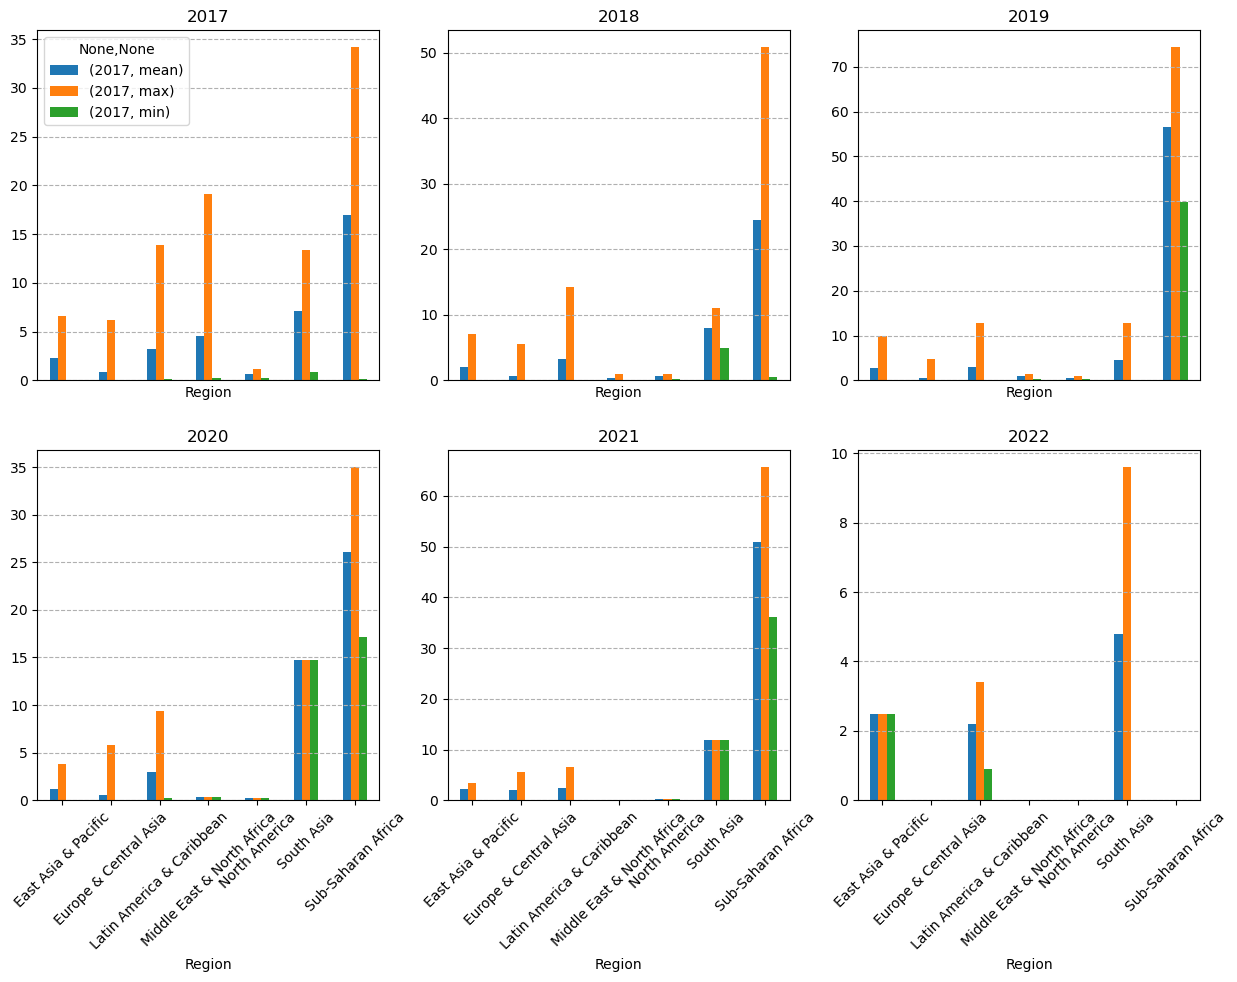

In [34]:
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

# Iterando sobre os dataframes e subplots
for i, (ano, ax) in enumerate(zip(range(2017,2023),axs.flatten())):
    df = poverty_headcount_ratio.groupby('Region').agg({f'{ano}':['mean','max','min']})
    leg = True if i == 0 else False
    df.plot(kind='bar',ax=ax, legend=leg)
    ax.set_title(f'{ano}')
    ax.tick_params(axis='x', rotation=45)  # Rotação dos rótulos do eixo X para melhor legibilidade
    if i < 3:
        ax.set_xticks([])
    ax.grid(which='major', axis='y', linestyle='--')

## Indicadores - Demografia
### School enrollment, primary and secondary (gross), gender parity index (GPI)

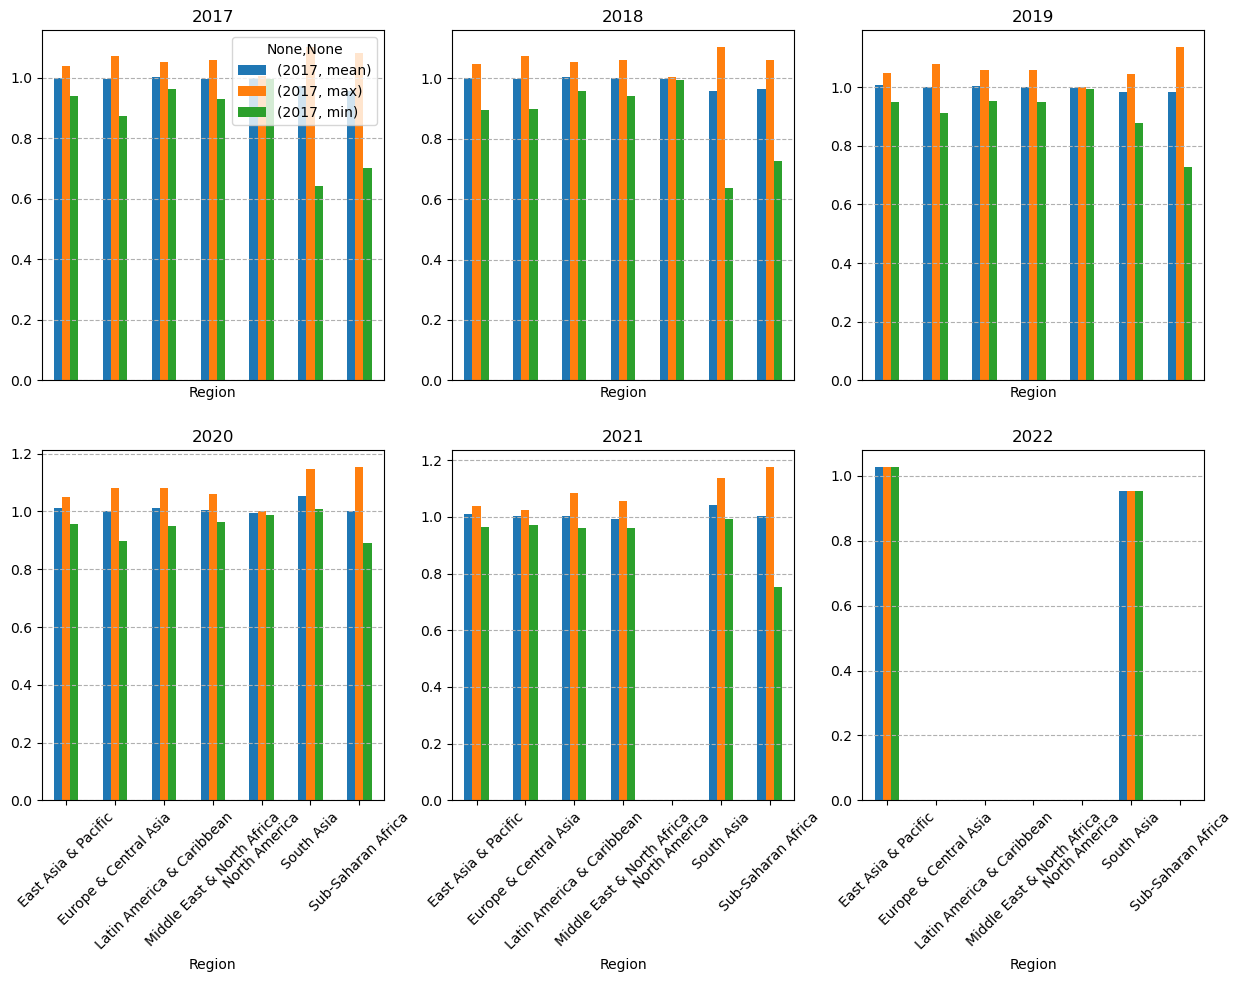

In [37]:
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

# Iterando sobre os dataframes e subplots
for i, (ano, ax) in enumerate(zip(range(2017,2023),axs.flatten())):
    df = school_enrollment.groupby('Region').agg({f'{ano}':['mean','max','min']})
    leg = True if i == 0 else False
    df.plot(kind='bar',ax=ax, legend=leg)
    ax.set_title(f'{ano}')
    ax.tick_params(axis='x', rotation=45)  # Rotação dos rótulos do eixo X para melhor legibilidade
    if i < 3:
        ax.set_xticks([])
    ax.grid(which='major', axis='y', linestyle='--')

In [38]:
anos_valores = {str(ano): 'mean' for ano in range(1993, 2023)}
regioes_escola = school_enrollment.groupby('Region').agg(anos_valores)


,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
Region,,,,,,,,,,,,,,,,,,,,,
East Asia & Pacific,0.966274,0.969702,0.986249,0.999490,1.002127,0.983006,0.988332,0.998207,0.992463,0.988510,...,0.999764,1.005854,1.001886,1.004322,0.999527,1.001059,1.007837,1.012156,1.008418,1.027511
Europe & Central Asia,1.005492,1.001773,1.004470,1.012852,1.004935,1.010160,0.996811,1.004455,1.002462,1.000957,...,0.999714,0.999346,0.999856,0.997219,0.995530,0.998350,0.999304,1.001211,1.001832,NaN
Latin America & Caribbean,1.006038,1.017351,1.010384,0.985176,1.019277,1.003884,1.003587,1.012231,1.010480,1.014909,...,1.010387,1.005042,1.003840,1.001575,1.002702,1.003005,1.004871,1.010388,1.002058,NaN
Middle East & North Africa,0.919257,0.928088,0.923205,0.916726,0.931483,0.968111,0.913466,0.947789,0.935477,0.967011,...,0.990986,1.015628,1.021041,0.994751,0.996388,1.002354,1.002246,1.003694,0.991682,NaN
North America,0.989475,0.990810,0.997500,0.993700,NaN,1.013825,1.009420,1.010570,1.039140,1.061550,...,1.023300,1.021947,1.020657,1.002220,0.999545,0.999015,0.998210,0.994710,NaN,NaN
South Asia,0.689580,0.772888,0.784320,0.814520,0.885575,0.911145,0.840757,0.852827,0.695086,0.881913,...,0.935594,0.922026,0.918996,0.938682,0.971177,0.959279,0.983906,1.055159,1.040128,0.954388
Sub-Saharan Africa,0.807795,0.814614,0.804431,0.808367,0.814418,0.879481,0.831088,0.835335,0.847764,0.865363,...,0.945411,0.938762,0.931785,0.945834,0.956427,0.964683,0.984529,1.003201,1.002723,NaN


<Axes: title={'center': 'Razão entre meninas e meninos matriculados em escolas'}, xlabel='Ano', ylabel='razão'>

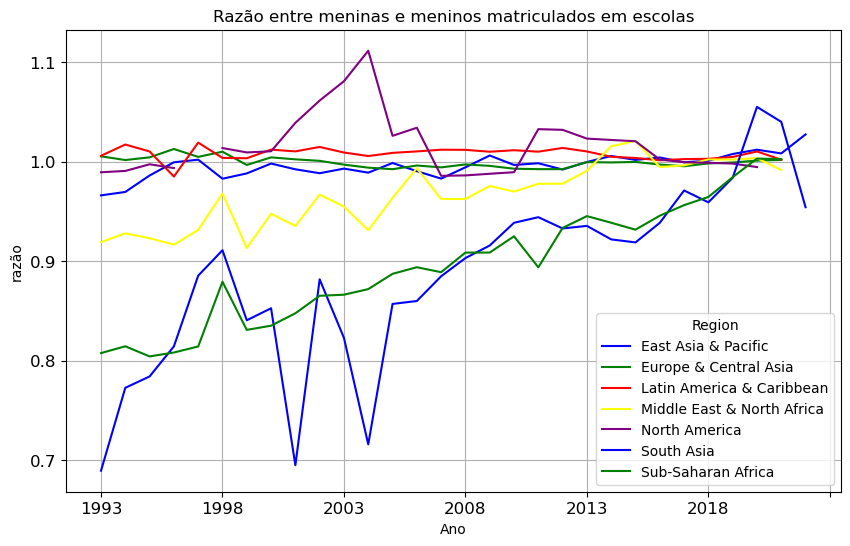

In [44]:
regioes_escola.T.plot(kind='line', figsize=(10, 6), grid=True, title='Razão entre meninas e meninos matriculados em escolas', xlabel='Ano', ylabel='razão', fontsize=12, color=['blue', 'green', 'red', 'yellow', 'purple'])